In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Insurance Premium.csv")

In [4]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Children  1338 non-null   int64  
 5   Smoker    1338 non-null   object 
 6   Region    1338 non-null   object 
 7   Premium   1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [7]:
df.describe()

,ID,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.414798
std,386.391641,14.049960,6.098187,1.205493,12110.012882
min,1.000000,18.000000,15.960000,0.000000,1122.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.000000
75%,1003.750000,51.000000,34.693750,2.000000,16640.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.000000


In [8]:
df[['Gender']].value_counts()

Gender
male      676
female    662
dtype: int64

In [9]:
df[['Smoker']].value_counts()

Smoker
no        1064
yes        274
dtype: int64

In [10]:
df[['Region']].value_counts()

Region
east      364
south     325
west      325
north     324
dtype: int64

In [11]:
df.columns

Index(['ID', 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region',
       'Premium'],
      dtype='object')

In [12]:
#Get Encoding of categorical features

In [15]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [16]:
df.replace({'Smoker':{'no':0,'yes':1}},inplace=True)

In [17]:
df.replace({'Region':{'north':0,'east':1,'south':2,'west':3}},inplace=True)

In [19]:
df[['Gender']].value_counts()

Gender
0         676
1         662
dtype: int64

In [20]:
y=df['Premium']

In [21]:
y.shape

(1338,)

In [22]:
X=df.drop(['ID','Premium'],axis=1)

In [23]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,2


In [24]:
X.shape

(1338, 6)

In [25]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,1,27.900,0,1,2,16885
1,2,18,0,33.770,1,0,1,1726
2,3,28,0,33.000,3,0,1,4449
3,4,33,0,22.705,0,0,3,21984
4,5,32,0,28.880,0,0,3,3867


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
X_std=df[['Age','BMI']]

In [29]:
X_std=sc.fit_transform(X_std)

In [30]:
X_std

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [33]:
X[['Age','BMI']]=pd.DataFrame(X_std,columns=['Age','BMI'])

In [35]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,-1.438764,1,-0.453320,0,1,2
1,-1.509965,0,0.509621,1,0,1
2,-0.797954,0,0.383307,3,0,1
3,-0.441948,0,-1.305531,0,0,3
4,-0.513149,0,-0.292556,0,0,3
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,3
1334,-1.509965,1,0.206139,0,0,0
1335,-1.509965,1,1.014878,0,0,1
1336,-1.296362,1,-0.797813,0,0,2


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=53)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr=RandomForestRegressor(random_state=100)

In [41]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=100)

In [42]:
y_pred=rfr.predict(X_test)

In [43]:
y_pred.shape

(268,)

In [44]:
y_pred

array([41904.02      ,  7909.87      ,  9978.74      , 13342.43      ,
       39563.01      ,  6353.6       ,  5041.94      ,  9328.37      ,
        8425.75      , 12139.85      ,  7913.59      ,  4792.02      ,
       15467.36      ,  5010.02      ,  9621.99      ,  3142.61      ,
       15961.21      ,  9770.72      , 43650.15      , 15549.1       ,
        1621.39      , 22356.8       , 10206.89      ,  8618.84      ,
       25446.83      , 12273.83      , 13486.48      , 12860.4       ,
       28501.03      , 50289.76      ,  9752.92      , 16292.53      ,
        1293.47      ,  6679.84      , 15987.75      , 13875.04      ,
        8047.78      , 12644.54      ,  1814.82      ,  6056.69      ,
       12247.21      ,  6206.57      , 47738.26      ,  7254.38      ,
        6471.02      ,  5720.92      ,  7498.24      ,  2761.82      ,
        8063.31      ,  2132.39      ,  8369.06      , 13083.4       ,
        3389.7       , 15131.72      ,  9131.4275    ,  7996.32      ,
      

In [45]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [46]:
mean_squared_error(y_test,y_pred)

23887733.972307824

In [47]:
mean_absolute_error(y_test,y_pred)

2585.8868022388056

In [48]:
r2_score(y_test,y_pred)

0.8432944223646852

In [49]:
#Get Visualization of actual Vs Predicted Results

In [50]:
import matplotlib.pyplot as plt

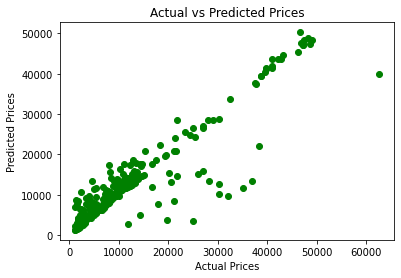

In [51]:
plt.scatter(y_test,y_pred,color='g')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [81]:
X_new=X_new.sample(1)

In [82]:
X_new

,ID,Age,Gender,BMI,Children,Smoker,Region
28,29,23,0,17.385,1,0,3


In [89]:
X_std=df[['Age','BMI']]
X_std=sc.fit_transform(X_std)
X_new[['Age','BMI']]=pd.DataFrame(X_new,columns=['Age','BMI'])

In [88]:
X

,Age,Gender,BMI,Children,Smoker,Region
0,-1.438764,1,-0.453320,0,1,2
1,-1.509965,0,0.509621,1,0,1
2,-0.797954,0,0.383307,3,0,1
3,-0.441948,0,-1.305531,0,0,3
4,-0.513149,0,-0.292556,0,0,3
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,3
1334,-1.509965,1,0.206139,0,0,0
1335,-1.509965,1,1.014878,0,0,1
1336,-1.296362,1,-0.797813,0,0,2


In [107]:
X=X.sample(1)

In [108]:
X

,Age,Gender,BMI,Children,Smoker,Region
1188,0.270064,1,-0.884757,1,1,0


In [109]:
rfr.predict(X)

array([22191.76])